In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import acquire
import prepare 
from scipy import stats
import itertools

from env import host, username, password, get_db_url
from pydataset import data
from FUNctions import describe_data, display_uniques

import warnings 
warnings.filterwarnings("ignore")

# 4.) 
## In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
    - random stranger: "Wait, what? Why are we starting on number four!?"
    - This is _my notebook_. Jkjkjk, well it really is, but the previous three exercises       - were taken care of and don't need to be listed here. 

In [2]:
# data('iris', show_doc=True)
df_iris = data('iris')
# The function I made completes all the requirements of this problem and throws in information about NA's. 

describe_data(df_iris)

The first three rows are: 
----------------------------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(150, 5)
-------------------------
The data types and column names are: 
['Petal.Length', 'Petal.Width', 'Sepal.Length', 'Sepal.Width', 'Species']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    o

In [3]:
sns.get_dataset_names()
df_iris2 = sns.load_dataset('iris')
# describe_data(df_iris2)
# same old song and dance except the column names are underscored. 

# 5.) 

## Read the Table1_CustDetails table from your spreadsheet exercises google sheet into a dataframe named df_google_sheets.

Ensure this spreadsheet is publicly visible under my share settings. 

- assign the first 100 rows to a new dataframe, df_google_sheets_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.



In [4]:
# read_csv: Read from a local csv, or from a the cloud (Google Sheets or AWS S3).

sheet_url = 'https://docs.google.com/spreadsheets/d/1bZ1IsTOTITvOPn0WsbFjYPZEqAVkoNMwx0RvWCPciZs/edit#gid=132258133'


# the __replace__ method modifies the share url to be a csv export url. 

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')


# Now just use the read_csv() method IOT create the DataFrame. 

df_googlesheet = pd.read_csv(csv_export_url)
# describe_data(df_googlesheet)

# df_google_sheets_sample = pd.DataFrame()
# df_google_sheets_sample.loc[df_googlesheet.index[100]] = df_googlesheet.iloc[100]
# This is not going the way I wanted, and append doesn't work either. Let's see if I can 
# capture it just using head(). 

df_google_sheets_sample = df_googlesheet.head(100)
df_google_sheets_sample



,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,servicetype,internet_service,internet_servicename,contract_type,...,has_phone,has_internet,has_phone_and_internet,partner_dependents,tenure,total_w_tenure,Match Tenure Total,Descriptor,TenureMonths,TenureYears
0,0002-ORFBO,Female,0,Yes,Yes,1,One Line,1,DSL,1,...,True,True,True,3,9.044207,65.6,TRUE,Phone and Internet,9,< 1 year
1,0003-MKNFE,Male,0,No,No,2,Two or More Lines,1,DSL,0,...,True,True,True,0,9.055092,59.9,TRUE,Phone and Internet,9,< 1 year
2,0004-TLHLJ,Male,0,No,No,1,One Line,2,Fiber Optic,0,...,True,True,True,0,3.800406,73.9,TRUE,Phone and Internet,4,< 1 year
3,0011-IGKFF,Male,1,Yes,No,1,One Line,2,Fiber Optic,0,...,True,True,True,1,12.631122,98,TRUE,Phone and Internet,13,1 - 2 years
4,0013-EXCHZ,Female,1,Yes,No,1,One Line,2,Fiber Optic,0,...,True,True,True,1,3.187128,83.9,TRUE,Phone and Internet,3,< 1 year
5,0013-MHZWF,Female,0,No,Yes,1,One Line,1,DSL,0,...,True,True,True,2,8.234150,69.4,TRUE,Phone and Internet,8,< 1 year
6,0013-SMEOE,Female,1,Yes,No,1,One Line,2,Fiber Optic,2,...,True,True,True,1,72.053327,109.7,TRUE,Phone and Internet,72,5 + years
7,0014-BMAQU,Male,0,Yes,No,2,Two or More Lines,2,Fiber Optic,2,...,True,True,True,1,63.529829,84.65,TRUE,Phone and Internet,64,5 + years
8,0015-UOCOJ,Female,1,No,No,1,One Line,1,DSL,0,...,True,True,True,0,7.061203,48.2,TRUE,Phone and Internet,7,< 1 year
9,0016-QLJIS,Female,0,Yes,Yes,2,Two or More Lines,1,DSL,2,...,True,True,True,3,65.869541,90.45,TRUE,Phone and Internet,66,5 + years


In [5]:
# print the number of rows of your original dataframe
print(f' The number of rows in the original dataframe is {df_googlesheet.shape[0]}')
print('----------------------------------------------------------')   
# print the first 5 column names
print(f' The names of the first five columns are: {df_googlesheet.columns[:5]}')
print('----------------------------------------------------------')   
# print the column names that have a data type of object

print(f' Column names which are considered to be objects: {df_googlesheet.select_dtypes(include="object").columns}') # {df_googlesheet.select_dtypes(include='object')}')
# df_googlesheet.select_dtypes(include='object').columns
print('----------------------------------------------------------')   
# compute the range for each of the numeric variables.


df_googlesheet.describe()
# range will be max minus min. The only two columns this will work on are
# monthly and total charges. Everything else would effectively just be the max. 
# It would be fastest to select what I want versus removing the ones I don't want. 
# targets = ['monthly_charges', 'total_charges']
# seeking_range = df_googlesheet[df_googlesheet.isin(targets)]
# seeking_range.head() THIS MADE ALL NANS, EF. Is in was seeking values in an unspecified column. 

# More easily accomplished when this set is transposed. 
rangers = df_googlesheet[['monthly_charges', 'total_charges']].describe().T
rangers

#Now I just need to create a new column with the range. 
rangers['range'] = rangers['max'] - rangers['min']
rangers_endangered = rangers['range']
# rangers_endangered
print(f' The computed range for each of the numeric variables is {rangers_endangered}')
print('----------------------------------------------------------') 



 The number of rows in the original dataframe is 7049
----------------------------------------------------------
 The names of the first five columns are: Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')
----------------------------------------------------------
 Column names which are considered to be objects: Index(['customer_id', 'gender', 'partner', 'dependents', 'servicetype',
       'internet_servicename', 'contractname', 'payment_type', 'churn',
       'total_w_tenure', 'Match Tenure Total', 'Descriptor', 'TenureYears'],
      dtype='object')
----------------------------------------------------------
 The computed range for each of the numeric variables is monthly_charges     100.5
total_charges      8666.0
Name: range, dtype: float64
----------------------------------------------------------


# 6.) 
### Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). Read the Table1_CustDetails worksheet into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

Effectively the same as last time, just different data but same problems. 

In [6]:
df_excel = pd.read_excel('Spreadsheet_exercises.xlsx', sheet_name='Table1COPY')
describe_data(df_excel)

#assign the first 100 rows to a new data frame, df_excel_sample

df_excel_sample = df_excel.head(100)

The first three rows are: 
----------------------------------------------------------
  customer_id  gender  is_senior_citizen partner dependents  phone_service  \
0  0002-ORFBO  Female                0.0     Yes        Yes            1.0   
1  0003-MKNFE    Male                0.0      No         No            2.0   
2  0004-TLHLJ    Male                0.0      No         No            1.0   

         servicetype  internet_service internet_servicename  contract_type  \
0           One Line               1.0                  DSL            1.0   
1  Two or More Lines               1.0                  DSL            0.0   
2           One Line               2.0          Fiber Optic            0.0   

   ... has_phone has_internet  has_phone_and_internet  partner_dependents  \
0  ...      True         True                    True                   3   
1  ...      True         True                    True                   0   
2  ...      True         True                    True    

TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
# print the number of rows of your original dataframe
print(f' The number of rows in the original dataframe is {df_excel.shape[0]}')
print('----------------------------------------------------------')   
# print the first 5 column names
print(f' The names of the first five columns are: {df_excel.columns[:5]}')
print('----------------------------------------------------------')   
# print the column names that have a data type of object

print(f' Column names which are considered to be objects: {df_excel.select_dtypes(include="object").columns}') # {df_googlesheet.select_dtypes(include='object')}')
# df_googlesheet.select_dtypes(include='object').columns
print('----------------------------------------------------------')   
# compute the range for each of the numeric variables.

# More easily accomplished when this set is transposed. 
dangerous_rangers = df_excel[['monthly_charges', 'total_charges']].describe().T
dangerous_rangers

#Now I just need to create a new column with the range. 
dangerous_rangers['range'] = dangerous_rangers['max'] - dangerous_rangers['min']
dangerous_rangers
# rangers_endangered
print(f' The computed range for each of the numeric variables is {rangers_endangered}')
print('----------------------------------------------------------') 




# 7.) 
### Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357) into a dataframe, df_google.
I can use my handy-dandy describe data function from earlier for this :D 

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [ ]:
sheet_url2 = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
    
csv_export_url2 = sheet_url2.replace('/edit#gid=', '/export?format=csv&gid=')

# Now just use the read_csv() method IOT create the DataFrame. 

df_google = pd.read_csv(csv_export_url2)

describe_data(df_google)

In [ ]:
# summary statistics look a bit messy. I'll try transposing them. 
df_google.describe().T
# much better. 
# Discrete:Passenger ID, Survived (boolean), Pclass, Age, Ticket(creates complications via string), 
# SibSp (number of siblings, spouses aboard), Parch(number of parents, children aboard)

In [ ]:
#sns.get_dataset_names()
#titanic = sns.load_dataset('titanic', show_doc = True)
for col in df_google.columns:
    print(f'{col} has {df_google[col].nunique()} unique values.')

***
***
# Data Preparation 
#### as defined in the [Gartner Glossary](https://www.gartner.com/en/information-technology/glossary/data-preparation)

### Data preparation is an iterative-agile process for exploring, combining, cleaning and transforming raw data into curated datasets for self-service data integration, data science, data discovery, and BI/analytics. To perform data preparation, data preparation tools are used by analysts, citizen data scientists and data scientists for self-service. The tools are also used by citizen integrators and data engineers for data enablement to reduce the time and complexity of interactively accessing, cataloging, harmonizing, transforming and modeling data for analytics in an agile manner with metadata and lineage support. These tools can provide data access for use in mostly analytical tasks that include storage, logical and physical data modeling, and data manipulation for data visualization, data integration and analytics. Some tools support machine-learning algorithms that can recommend or even automate actions to augment and accelerate data preparation.

***
***
***
***
# DATA PREPARATION EXERCISES
The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

In [ ]:
from acquire import get_iris_data, get_telco_data, get_titanic_data

# The dir() is a built-in-function in python. The dir() returns all the properties
# and methods, including the given object’s built-in properties.

# So when dir() is used on the module, it will give you the variables,
# functions that are present inside the module.

# acquire_details = dir(acquire)
# print(acquire_details)

## 1.) Using the Iris Data:

### a.) Use the function defined in acquire.py to load the iris data.

In [ ]:
iris = get_iris_data()
describe_data(iris)

### b.) Drop the species_id and measurement_id columns.

In [ ]:
# measurement_id is a red herring, it does not exist. 
# at first I thought perhaps I ran my query incorrectly, so I went with SELECT *
# but it still doesn't exist. Anyway, I'll drop species_id. 

iris = iris.drop(columns='species_id')
iris.head(5)

### c.) Rename the species_name column to just species.

In [ ]:
iris = iris.rename(columns={'species_name': 'species'})
# iris.head(100)

### d.) Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [ ]:
species_as_dummies = pd.get_dummies(iris.species)
# species_as_dummies.head(100)

In [ ]:
iris = pd.concat([iris, species_as_dummies], axis=1)
# iris.head(102)

### e.) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(df):
    df = df.drop(columns='species_id').rename(columns={'species_name': 'species'})
    species_as_dummies = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df, species_as_dummies], axis=1)
    return df

In [ ]:
iris_goo_goo = get_iris_data()
iris_goo_goo = prep_iris(iris_goo_goo)
iris_goo_goo.T

***

# 2.)Using the Titanic dataset

### a.) Use the function defined in acquire.py to load the Titanic data.

In [ ]:
titanic = get_titanic_data()
describe_data(titanic)

### b.) Drop any unnecessary, unhelpful, or duplicated columns.

In [ ]:
# keep embark_town, it is more detailed than embarked, which contains essentially the same information. 
# remove class in favor of pclass, class is merely an object, pclass is encoded int64 while conveying the same. 
# passenger_id is irrelevant and matches dataframe row index. Remove it. 
# deck has too many NaNs. It has to go. 
columns_to_drop = ['deck', 'age', 'embarked', 'class', 'passenger_id']
titanic = titanic.drop(columns = columns_to_drop)
titanic.head()

In [ ]:
titanic['embark_town'] = titanic.embark_town.fillna('Southampton')
titanic.isnull().sum()

### c.) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.



#### Method 1:  pd.get_dummies
pd.get_dummies [(documentation)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) returns a new dataframe that contains one-hot-encoded columns. We can observe that not all the columns were encoded. This is because, if no columns are passed to pd.get_dummies so as to tell which columns to one-hot-encode, by default it takes the columns with data-type ‘object’. It then encodes them and returns a new dataframe with new columns that replace the old categorical column. [source](https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a)

#### Method 2: sklearn.preprocessing.OneHotEncoder
sklearn.preprocessing.OneHotEncoder returns an object of sklearn.preprocessing.OneHotEncoder class. We can fit this object on the training set and then use the same object to transform the test set. On the other hand, pd.get_dummies returns a dataframe with encodings based on the values in the dataframe we pass to it. This might be good for a quick analysis, but for an extended model building project where you train on training set and will be later testing on a test set, sklearn is prefereable. This will be more difficult to implement, but worth the effort

In [ ]:
titanic_dummies = pd.get_dummies(titanic[['embark_town', 'sex']], dummy_na=False, drop_first=True)
titanic = pd.concat([titanic, titanic_dummies], axis=1)
titanic = titanic.rename(columns={'embark_town_Queenstown': 'Queenstown', 'embark_town_Southampton': 'Southampton', 'sex_male': 'male'})
titanic = titanic.drop(columns=['sex', 'embark_town'])
titanic.head()
# way too many columns. What happened?

### d.) Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [ ]:
def prep_titanic(df):
    '''
    takes in a dataframe of the titanic dataset as it is acquired and returns a cleaned dataframe
    arguments: df: a pandas DataFrame with the expected feature names and columns
    return: clean_df: a dataframe with the cleaning operations performed on it
    '''
    # drop any duplicate rows
    df = df.drop_duplicates()
    # drop columns we want to remove
    df = df.drop(columns=['deck', 'embarked', 'class', 'age', 'passenger_id'])
    # fill missing values
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    # encode categorical variables
    df_dummies = pd.get_dummies(titanic[['embark_town', 'sex']], dummy_na=False, drop_first=True)
    df = pd.concat([df, df_dummies], axis=1)
    df = df.rename(columns={'embark_town_Queenstown': 'Queenstown', 'embark_town_Southampton': 'Southampton', 'sex_male': 'male'})
    # df = df.drop(columns=['sex', 'embark_town'])
    return df.drop(columns=['sex', 'embark_town'])

In [ ]:
tight = get_titanic_data()
tighter = prep_titanic(tight)
tighter.head()

In [ ]:
#Plot the Correlation map to see how features are correlated with target
corr_matrix = titanic.corr()
plt.subplots(figsize=(5,3))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

***
# 3.) Using the Telco dataset

### a.) Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco = get_telco_data()
telco.drop_duplicates()
describe_data(telco)

### b.) Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
telco = telco.drop(columns=['customer_id', 'payment_type_id', 'internet_service_type_id', 'contract_type_id', 'total_charges', 'tech_support', 'streaming_tv', 'streaming_movies', 'online_backup', 'online_security'])
telco.head()

In [ ]:
telco.head(100)

### c.) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
telco['is_male'] = np.where(telco.gender == 'Male', 1, 0)
telco['has_partner'] = np.where(telco.partner == 'Yes', 1, 0)
telco['has_dependent'] = np.where(telco.dependents == 'Yes', 1, 0)
telco['has_phone'] = np.where(telco.phone_service == 'Yes', 1, 0)
telco['multiple_lines'] = np.where(telco.multiple_lines == 'Yes', 1, 0)
telco['has_internet'] = np.where(telco.internet_service_type == "None", 0, 1)
telco['fiber'] = np.where(telco.internet_service_type == "Fiber optic", 1, 0)
telco['no_contract'] = np.where(telco.contract_type == "Month-to-month", 1, 0)
telco['electronic_check'] = np.where(telco.payment_type == "Electronic check", 1, 0)
telco['paperless_billing'] = np.where(telco.paperless_billing == 'Yes', 1, 0)
telco['autopay'] = np.where(telco.payment_type.str.contains('automatic') == True, 1, 0)
telco['churn'] = np.where(telco.churn == 'Yes', 1, 0)

In [ ]:
telco = telco.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'internet_service_type', 'contract_type', 'payment_type', 'paperless_billing','churn', 'device_protection'])

In [ ]:
# describe_data(telco)
# there are no longer any object dtypes or categorical variables. Consequently, no dummies are needed.

### d.) Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
def prep_telco(df):
    # drop unnecessary, unhelpful, or duplicate columns. 
    df = df.drop(columns=['customer_id', 'payment_type_id', 'internet_service_type_id',
                                'contract_type_id', 'total_charges', 'tech_support', 'streaming_tv',
                                'streaming_movies', 'online_backup', 'online_security'])
    # Encode the categorical variables. 
    df['is_male'] = np.where(df.gender == 'Male', 1, 0)
    df['has_partner'] = np.where(df.partner == 'Yes', 1, 0)
    df['has_dependent'] = np.where(df.dependents == 'Yes', 1, 0)
    df['has_phone'] = np.where(df.phone_service == 'Yes', 1, 0)
    df['multiple_lines'] = np.where(df.multiple_lines == 'Yes', 1, 0)
    df['has_internet'] = np.where(df.internet_service_type == "None", 0, 1)
    df['fiber'] = np.where(df.internet_service_type == "Fiber optic", 1, 0)
    df['no_contract'] = np.where(df.contract_type == "Month-to-month", 1, 0)
    df['electronic_check'] = np.where(df.payment_type == "Electronic check", 1, 0)
    df['paperless_billing'] = np.where(df.paperless_billing == 'Yes', 1, 0)
    df['autopay'] = np.where(df.payment_type.str.contains('automatic') == True, 1, 0)
    df['churn'] = np.where(df.churn == 'Yes', 1, 0)
    # drop redundant, categorical variables. 
    df = df.drop(columns=['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
                                'internet_service_type', 'contract_type', 'payment_type', 'paperless_billing',
                                'churn', 'device_protection'])
    return df 

In [ ]:
telwhoah = get_telco_data()
telco = prep_telco(telwhoah)
telco.head()

*** 
# Exploratory Analysis Exercises


### Section 1 - iris_db. Use iris data from our server for these.
#### 1.1) Acquire, prepare & split your data.

In [2]:
dir(acquire) # tells you about the attributes that the package provides
iris_db = acquire.get_iris_data()
iris_db = prepare.prep_iris(iris_db)
iris_db.head()
# iris_db = iris_db.drop(columns=['versicolor', 'virginica']) # hashed out comments on prepare.py

#train, test = train_test_split(iris_db, test_size=0.8, random_state=1349, stratify = iris_db.species)
#train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify = train.species)

#checking for same number of columns throughout
#print(iris_db.shape, train.shape, validate.shape, test.shape)
# column numbers match up, groovy. 

# Before I had all this in the same code box and that may be what caused some strange errors. 

Using cached csv


,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [3]:
# 80/20 train test split
train, test = train_test_split(iris_db, train_size=0.8, random_state=1349, stratify=iris_db.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [4]:
print(iris_db.shape, train.shape, validate.shape, test.shape)
# FINALLY it matches. Never putting the train, test et cetera variables in the same code box again. 
# at least not until after I learn why all that happened. 

(150, 5) (84, 5) (36, 5) (30, 5)


In [5]:
# let's peek around at the train set. Choo choo. 
describe_data(train)

The first three rows are: 
----------------------------------------------------------
        species  sepal_length  sepal_width  petal_length  petal_width
138   virginica           6.0          3.0           4.8          1.8
7        setosa           5.0          3.4           1.5          0.2
79   versicolor           5.7          2.6           3.5          1.0
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(84, 5)
-------------------------
The data types and column names are: 
['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'species']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       84 non-null     object 
 1   sepal_length  84 non-null     float64
 2   sepal_width   84 non-null     float64
 3   petal_length  84 non-null     float64
 4   petal_wi

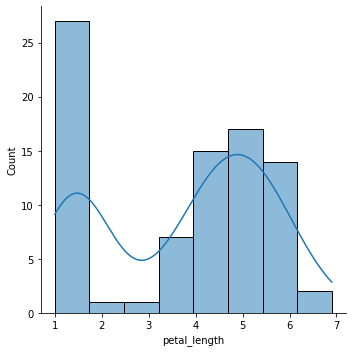

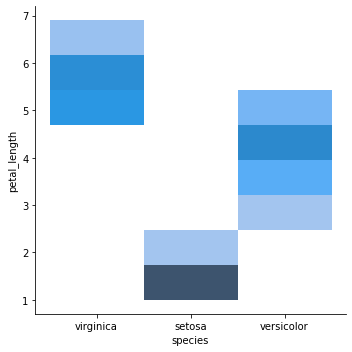

In [6]:
sns.displot(train.petal_length, kde=True)

sns.displot(data=train, x="species", y="petal_length")

# it is annoying to me that the variables aren't ordered alphabetically. 

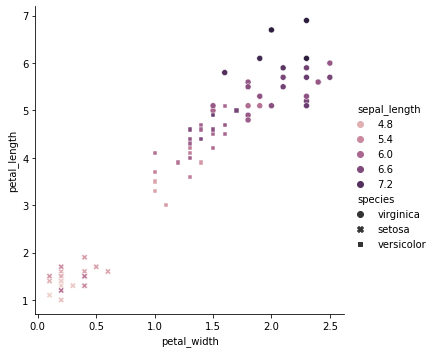

In [7]:
sns.relplot(data=train,
            x="petal_width",
            y="petal_length",
            hue="sepal_length",
            style="species"
            #col=""
)

In [ ]:
#corr_matrix = train.corr()
#plt.subplots(figsize=(5,3))
#sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap='flare')


The first three rows are: 
----------------------------------------------------------
      species      variable  value
0   virginica  sepal_length    6.0
1      setosa  sepal_length    5.0
2  versicolor  sepal_length    5.7
----------------------------------------------------------
The data frame's shape is: 
-------------------------
(336, 3)
-------------------------
The data types and column names are: 
['species', 'value', 'variable']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   336 non-null    object 
 1   variable  336 non-null    object 
 2   value     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB
None
----------------------------------------------------------
The summary statistics are as follows: 
----------------------------------------------------------
            value
count  336.000000
mean 

<AxesSubplot:xlabel='variable', ylabel='value'>

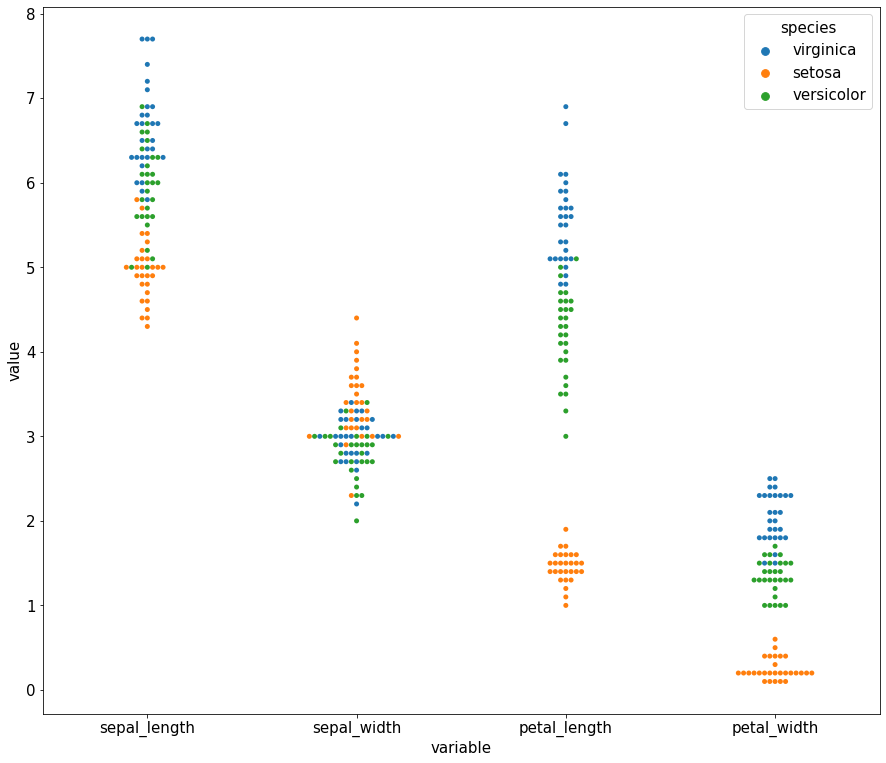

In [8]:
melted_train = train.melt(id_vars=['species'])
plt.rc('font', size=15)
plt.rc('figure', figsize=(15, 13))
print(f' the deets {describe_data(melted_train)}')
sns.swarmplot(data=melted_train, x='variable', y='value', hue='species')

# print("I'm beginning to think that these dummies are going to interfere")
# dummies excluded

In [9]:
# setting the columns as variables will make things easier later on. 
# at the very least, it will help me recall these as a list on the fly.

categorical = ['species']
quantitative = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#### 1.2) Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64

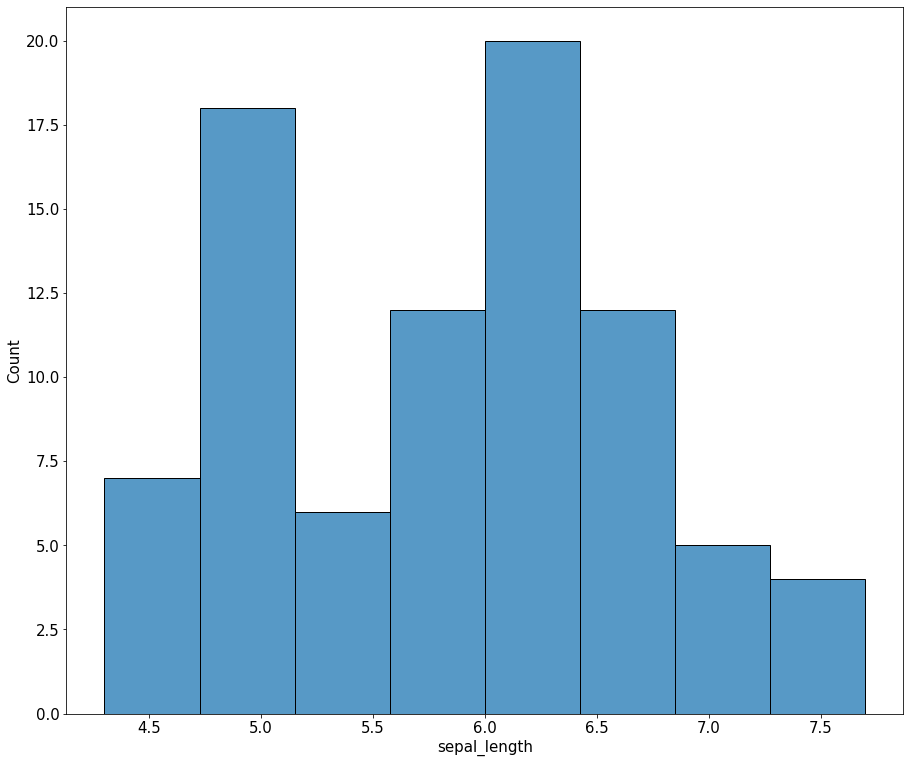

In [10]:
# Sepal Length.
sns.histplot(train.sepal_length)
train.sepal_length.describe()

<AxesSubplot:xlabel='sepal_length'>

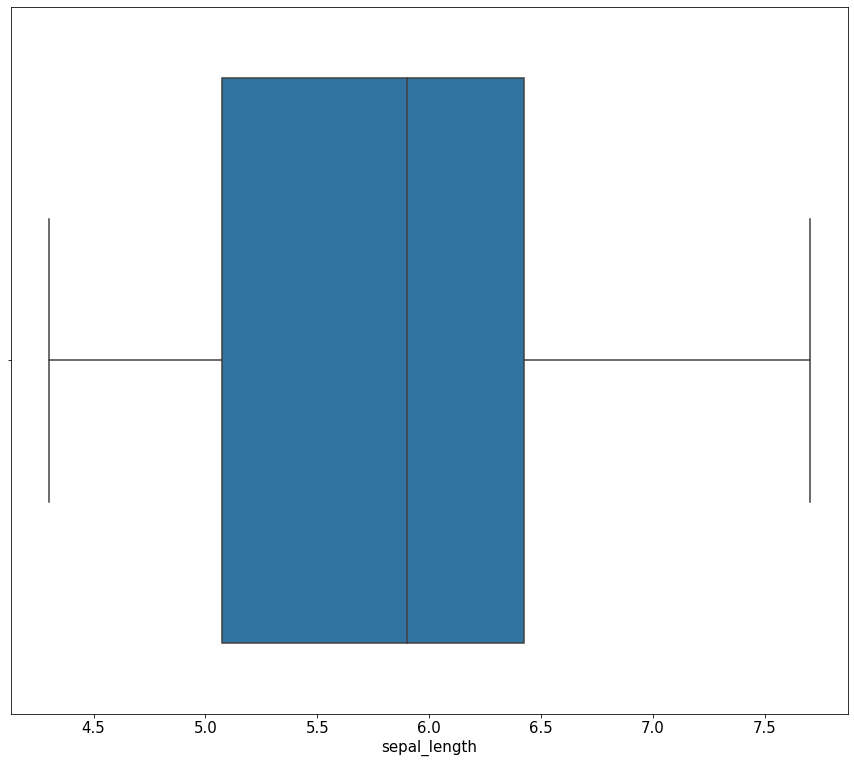

In [11]:
sns.boxplot(train.sepal_length)

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64

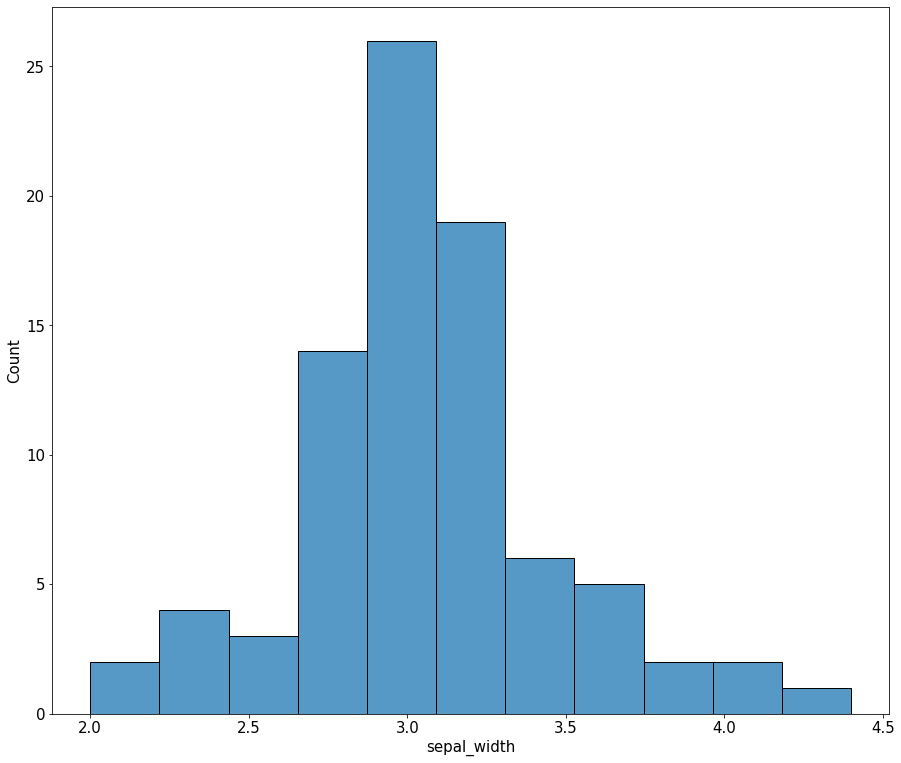

In [12]:
# Sepal Width.
sns.histplot(train.sepal_width)
train.sepal_width.describe()

<AxesSubplot:xlabel='sepal_width'>

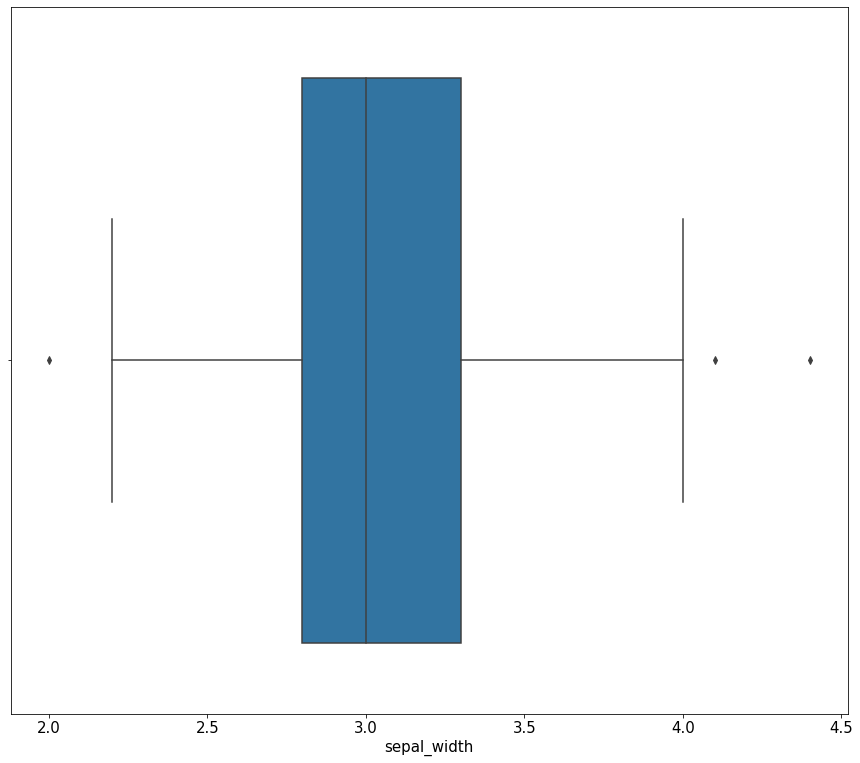

In [13]:
sns.boxplot(train.sepal_width)

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64

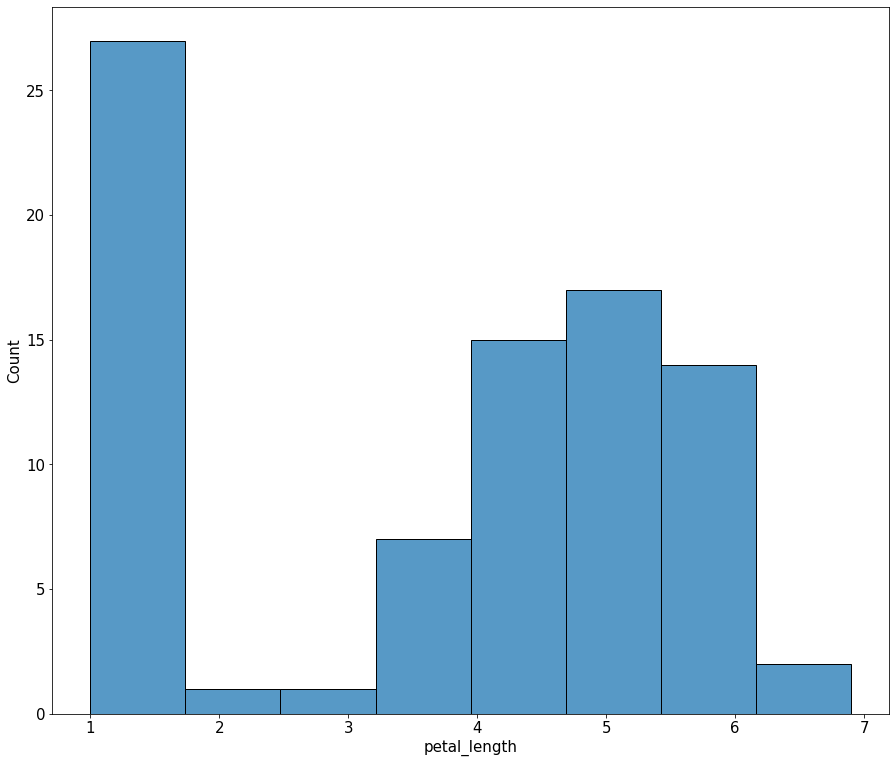

In [14]:
# Pedal Length
sns.histplot(train.petal_length)
train.petal_length.describe()

<AxesSubplot:xlabel='petal_length'>

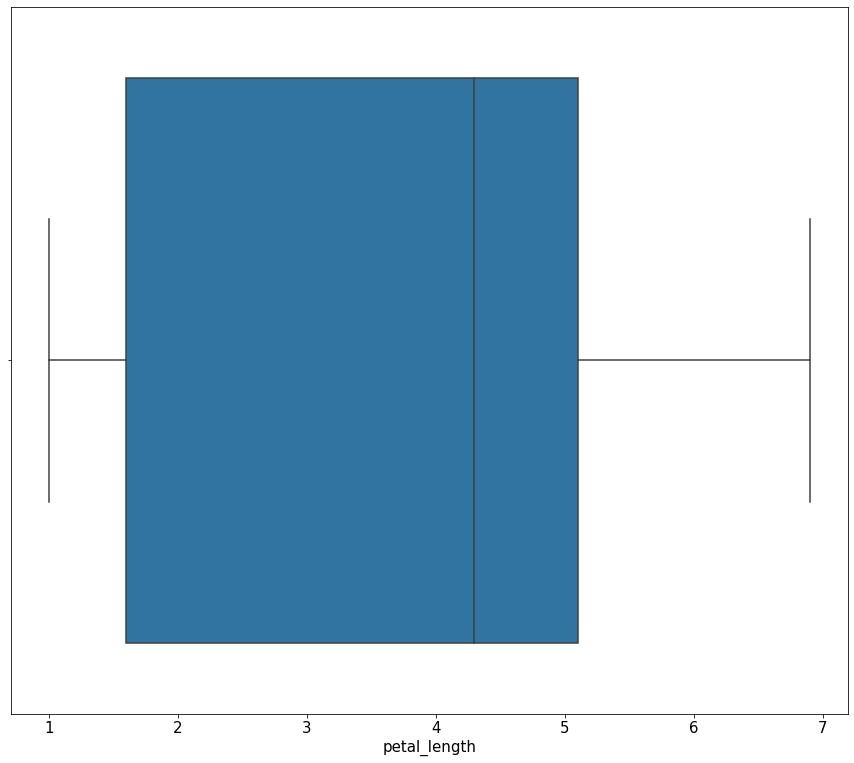

In [15]:
sns.boxplot(train.petal_length)

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64

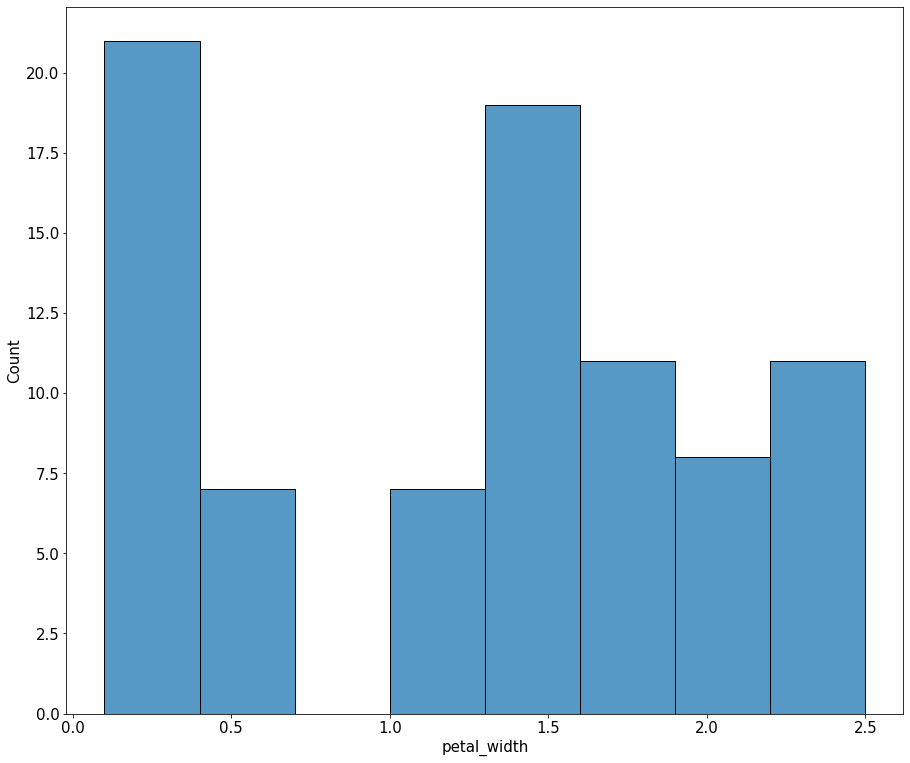

In [16]:
# Petal width
sns.histplot(train.petal_width)
train.petal_width.describe()

<AxesSubplot:xlabel='petal_width'>

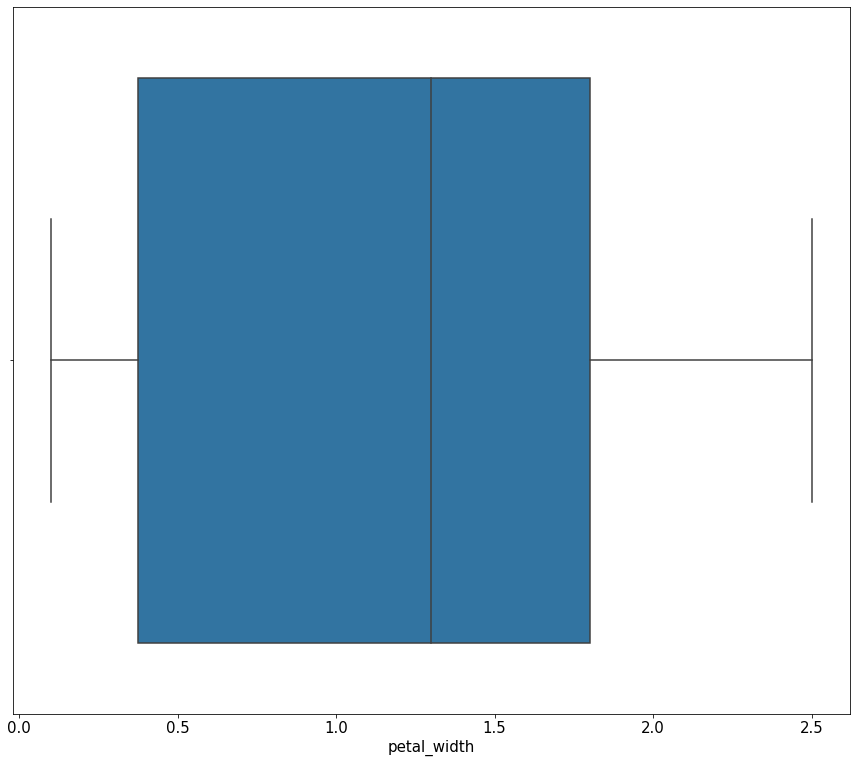

In [17]:
sns.boxplot(train.petal_width)

In [ ]:
# The only categorical variable is species. I need to plot a frequency table and barplot. 

 Let's go species
setosa        28
versicolor    28
virginica     28
dtype: int64


<AxesSubplot:xlabel='species'>

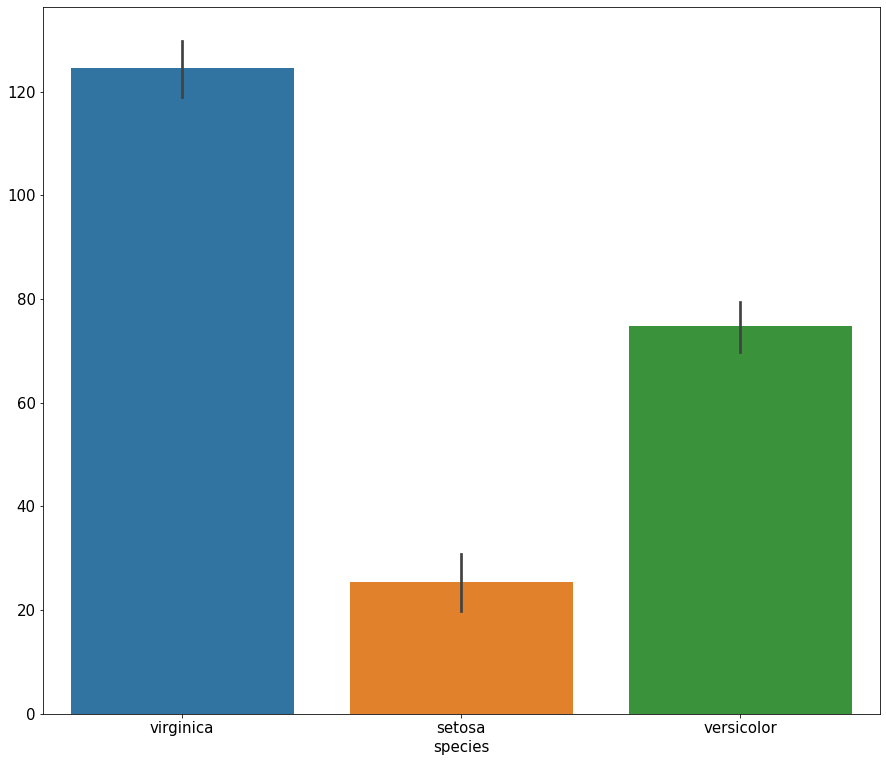

In [18]:
print(f" Let's go {train.value_counts('species')}")
sns.barplot( x =train.species, y = train.index)

In [ ]:
# add notes 

#### 1.3) Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

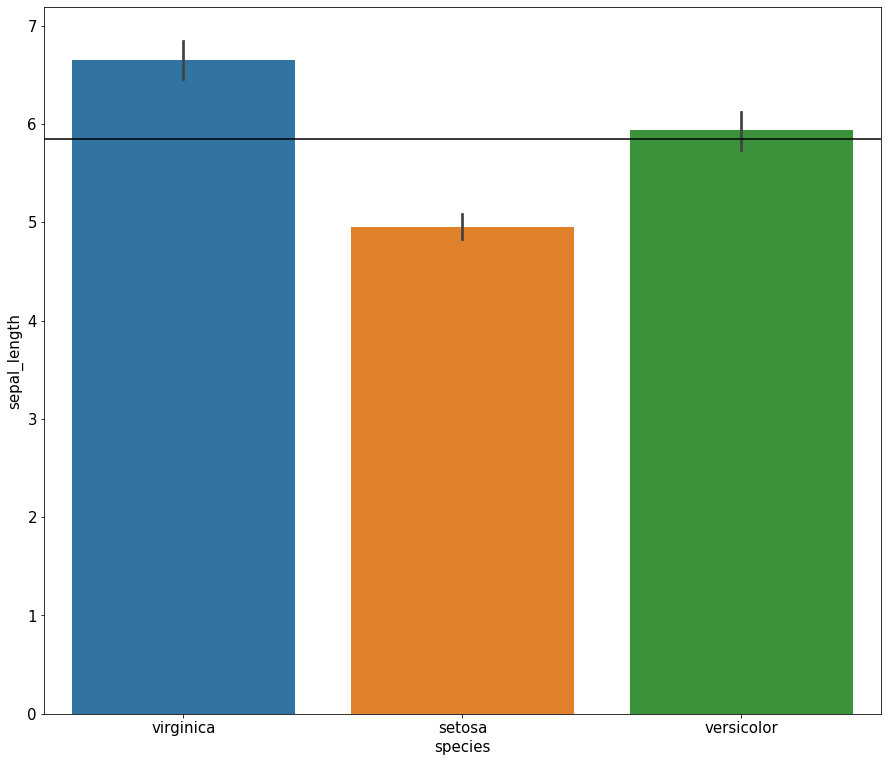

In [19]:
sns.barplot(data = train, y = 'sepal_length', x = 'species')
plt.axhline(y=train.sepal_length.mean(), color='black')



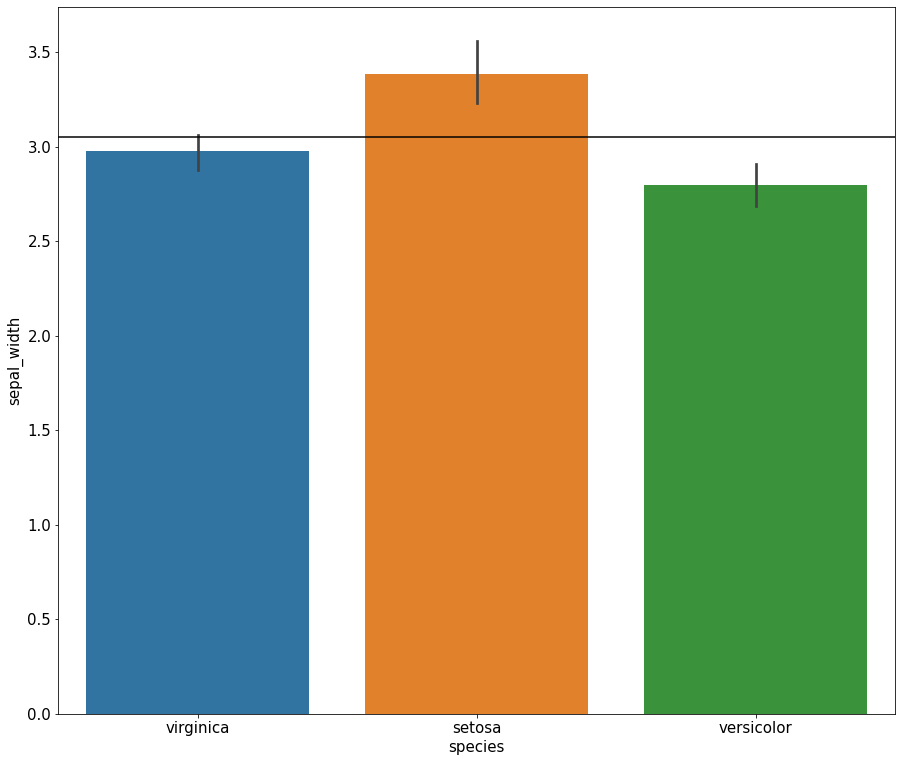

In [20]:
sns.barplot(data = train, y = 'sepal_width', x = 'species')
plt.axhline(y=train.sepal_width.mean(), color='black')

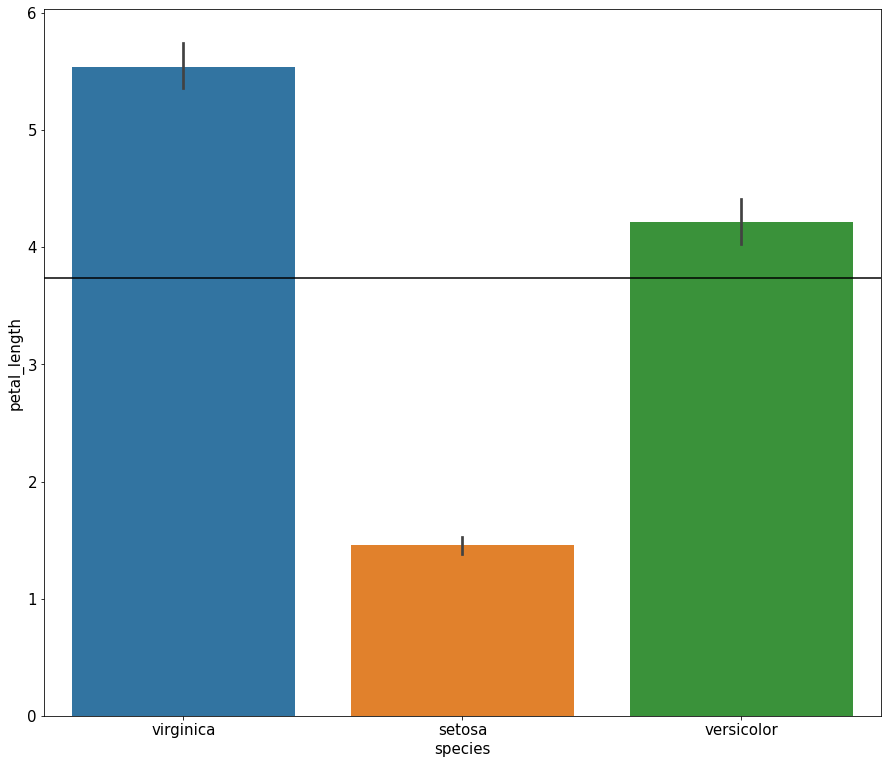

In [21]:
sns.barplot(data = train, y = 'petal_length', x = 'species')
plt.axhline(y=train.petal_length.mean(), color='black')

In [ ]:
sns.barplot(data = train, y = 'petal_width', x = 'species')
plt.axhline(y=train.petal_width.mean(), color='black')

In [22]:
train[train.species=='setosa'].describe()


,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [23]:
train[train.species=='virginica'].describe()#.drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [24]:
train[train.species=='virginica'].describe()#.drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [25]:
train[train.species=='versicolor'].describe()#.drop(columns=['versicolor','virginica'])

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [26]:
print(f"{train[train.species=='virginica'].petal_width.mean()}")
print(f"{train[train.species=='versicolor'].petal_width.mean()}")

2.0464285714285704
1.332142857142857


In [27]:
# establish variables that represent the species subset of train
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
# again, for versicolor
versicolor = train[train.species == 'versicolor']
# again, for setosa
setosa = train[train.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [17]:
for var in quantitative:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




#### 1.4) Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

In [28]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
138,virginica,6.0,3.0,4.8,1.8,18.00,8.64
7,setosa,5.0,3.4,1.5,0.2,17.00,0.30
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
74,versicolor,6.4,2.9,4.3,1.3,18.56,5.59
97,versicolor,6.2,2.9,4.3,1.3,17.98,5.59


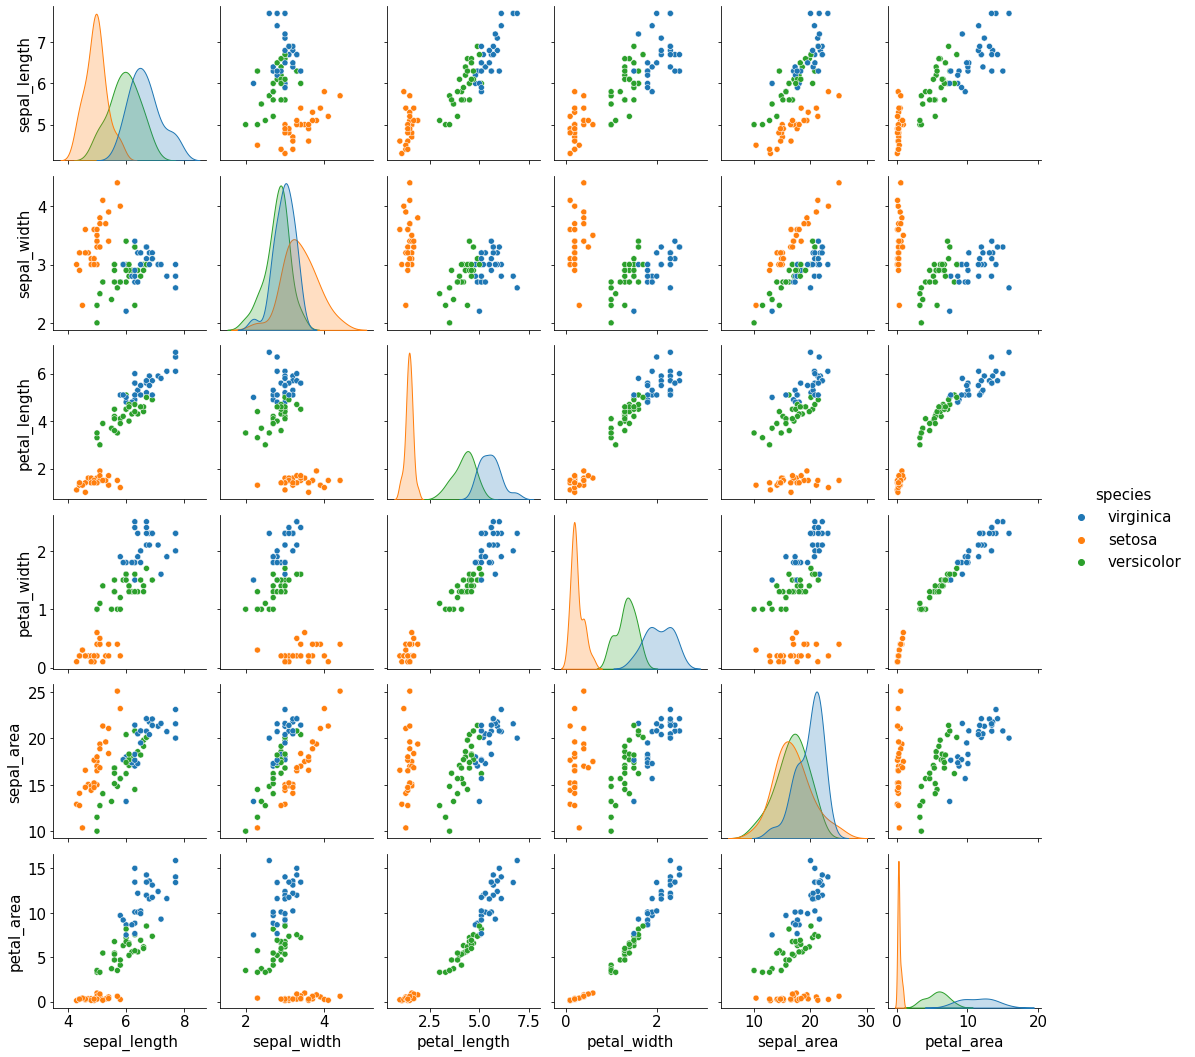

In [30]:
sns.pairplot(train, hue='species')
plt.show()

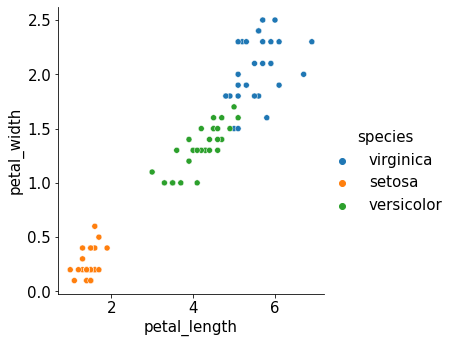

In [37]:
sns.relplot(x='petal_length',
            y='petal_width',
            data=train,
            hue='species')
plt.show()

<AxesSubplot:xlabel='variable', ylabel='value'>

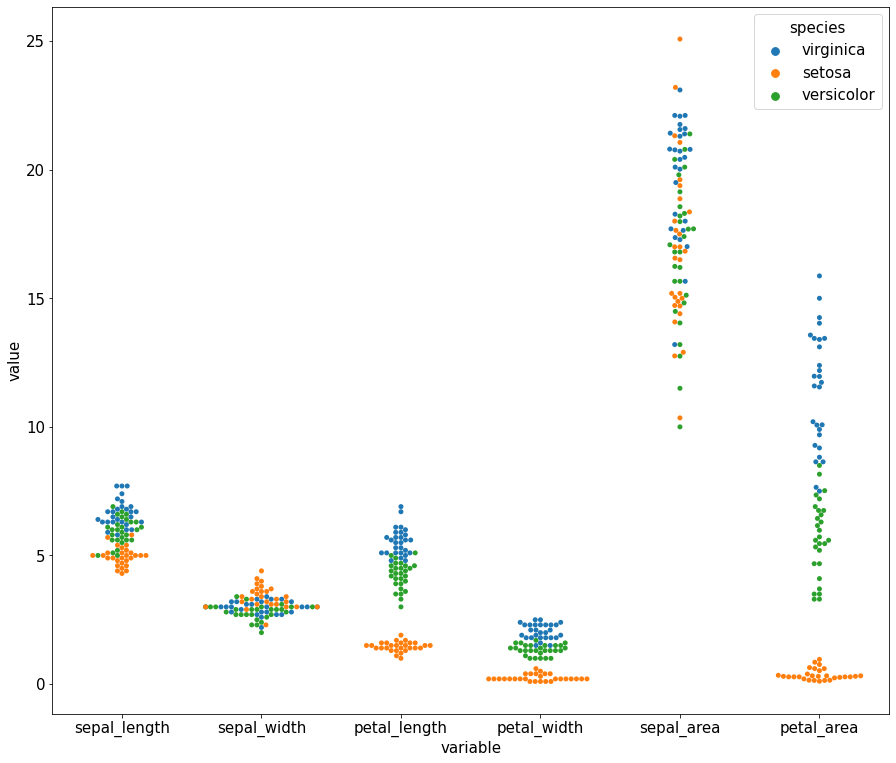

In [31]:
melted = train.melt(id_vars=['species'])
sns.swarmplot(data=melted, x='variable', y='value', hue='species')

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

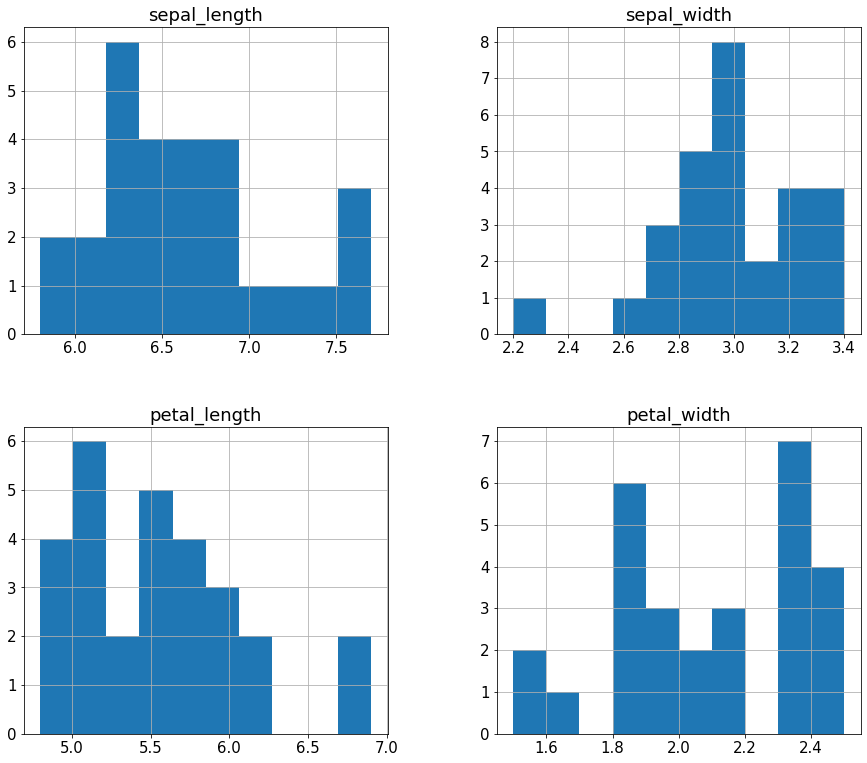

In [32]:
# Is the sepal length significantly different in virginica compared to versicolor?
virginica.hist()

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

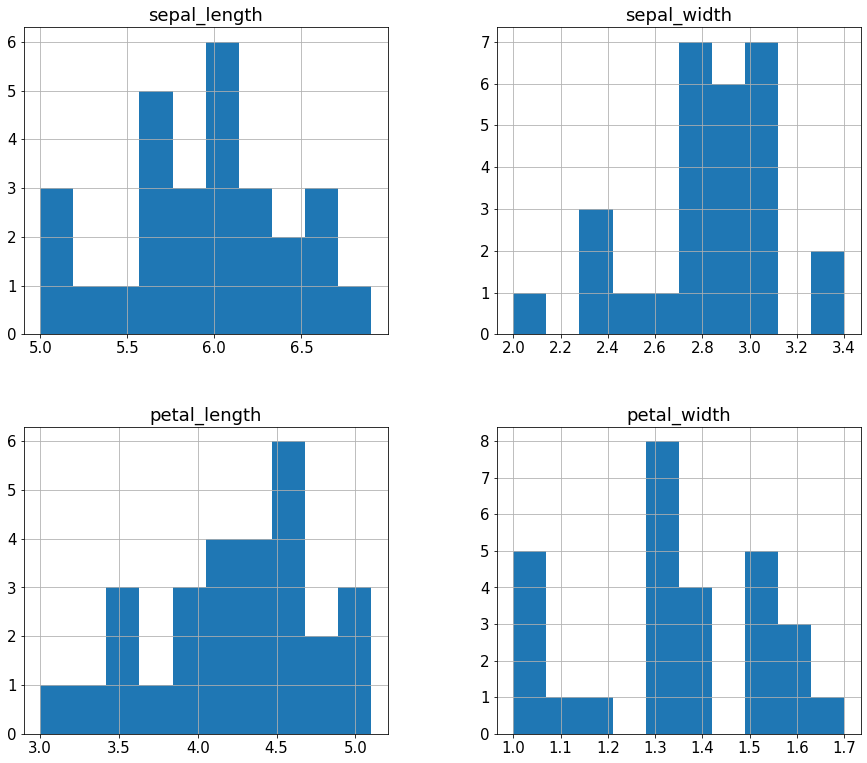

In [33]:
versicolor.hist()

In [36]:
t, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )
print(f' T: {t}')
print(f' P: {p}')
print(f' We reject the null that sepal length is the same for both groups.)

SyntaxError: EOL while scanning string literal (599935777.py, line 7)

### Section 2: Titanic Dataset

- 2.1) Determine drivers of the target variable
- 2.2) Determine if certain columns should be dropped
- 2.3) Determine if it would be valuable to bin some numeric columns
- 2.4) Determine if it would be valuable to combine multiple columns into one.

- 2.5)      
  - Does it make sense to combine any features?

  - Do you find any surprises?

  - Document any and all findings and takeaways in your notebook using markdown.

### Section 3: Telco Dataset

- 3.1) Determine if certain columns should be dropped
- 3.2) Determine if it would be valuable to bin some numeric columns
- 3.3) Determine if it would be valuable to combine multiple columns into one.
- 3.4) What are your drivers of churn?

- 3.5).     
  - Does it make sense to combine any features?

  - Do you find any surprises?

  - Document any and all findings and takeaways in your notebook using markdown.

*** 
***
***
***
Just for funsies


In [ ]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()